In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_orig = pd.read_csv("data/fluGT_Viral_US_final_15_19.csv")
X_orig.shape

(175, 5)

In [3]:
y_orig =pd.read_csv("data/usflu_weekly_final_15_19.csv")
y_orig.shape

(175, 3)

In [4]:
X_orig.head()

,Week,influenza,YEAR,WEEK,PERCENT POSITIVE
0,10/4/2015,16,2015,40,7.199298
1,10/11/2015,15,2015,41,5.034722
2,10/18/2015,13,2015,42,6.176962
3,10/25/2015,13,2015,43,4.662379
4,11/1/2015,12,2015,44,3.071672


In [5]:
X = X_orig[['influenza','PERCENT POSITIVE']]






In [7]:
y_orig.head()

,YEAR,WEEK,% WEIGHTED ILI
0,2015,40,1.22559
1,2015,41,1.31066
2,2015,42,1.37110
3,2015,43,1.39171
4,2015,44,1.43712


In [8]:
y=y_orig[['% WEIGHTED ILI']]

In [11]:
y['week'] = pd.date_range('2015-10-04','2019-02-09',freq='W')

C:\Users\guowc_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
y.tail()

,% WEIGHTED ILI,week
170,3.08666,2019-01-06
171,3.31026,2019-01-13
172,3.77069,2019-01-20
173,4.31372,2019-01-27
174,4.76853,2019-02-03


In [14]:
X['week'] = pd.date_range('2015-10-04','2019-02-09',freq='W')

C:\Users\guowc_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
X.head()

,influenza,PERCENT POSITIVE,week
0,16,7.199298,2015-10-04
1,15,5.034722,2015-10-11
2,13,6.176962,2015-10-18
3,13,4.662379,2015-10-25
4,12,3.071672,2015-11-01


In [17]:
y=y.set_index('week')

In [19]:
y.index

DatetimeIndex(['2015-10-04', '2015-10-11', '2015-10-18', '2015-10-25',
               '2015-11-01', '2015-11-08', '2015-11-15', '2015-11-22',
               '2015-11-29', '2015-12-06',
               ...
               '2018-12-02', '2018-12-09', '2018-12-16', '2018-12-23',
               '2018-12-30', '2019-01-06', '2019-01-13', '2019-01-20',
               '2019-01-27', '2019-02-03'],
              dtype='datetime64[ns]', name='week', length=175, freq=None)

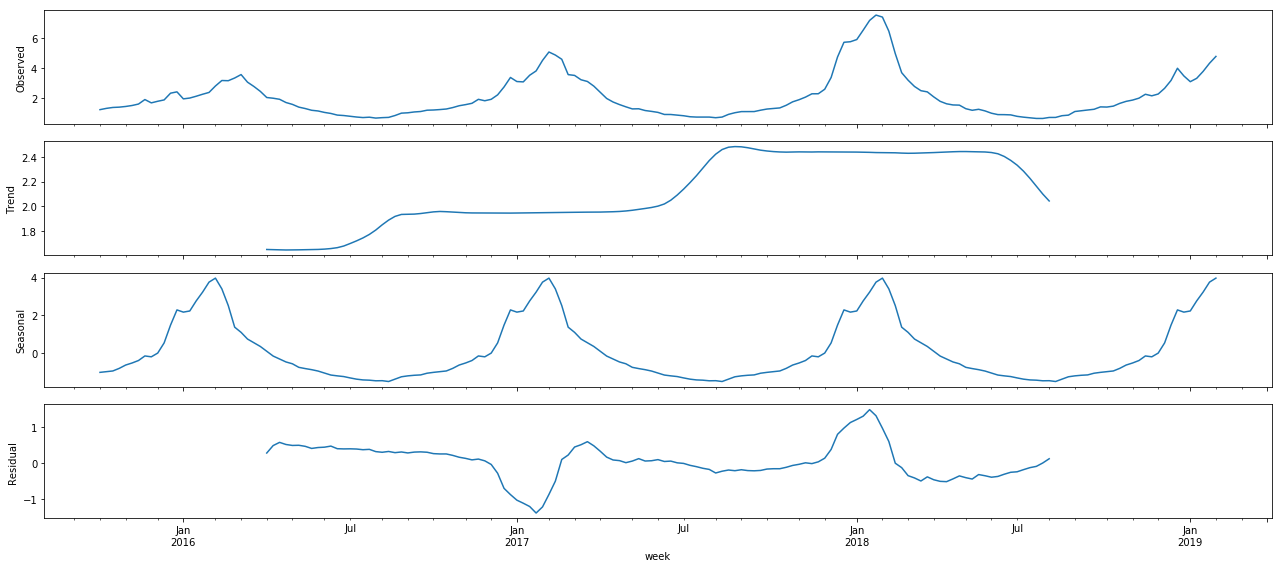

In [21]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [24]:
import itertools
p = d = q = np.arange(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [43]:
import warnings
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:819.6028724095518
ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:4985.762102914692
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:370.8766739581988
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:374.7899636947908
ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:3597.006707188365
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:240.37412193386908
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:594.832247457816
ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:8464.051221080777
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:229.98482818025332
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:234.09868162287748
ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:8084.2101073646845
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:156.0569128597726
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:107.87275639686561
ARIMA(0, 1, 0)x(0, 0, 1, 52)52 - AIC:4753.012553092155
ARIMA(0, 1, 0)x(0, 1, 0, 52)52 - AIC:41.48371629958779
ARIMA(0, 1, 0)x(1, 0, 0, 52)52 - AIC:38.99836264880658
ARIMA(0, 1, 0)x(1, 0, 1, 52)52 - AIC:2567.911710052207
ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:37.673761954348954
ARIMA

In [53]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9635      0.018     54.492      0.000       0.929       0.998
ma.L1          0.4970      0.069      7.211      0.000       0.362       0.632
ar.S.L52       0.7081      0.080      8.901      0.000       0.552       0.864
sigma2         0.0561      0.004     14.007      0.000       0.048       0.064


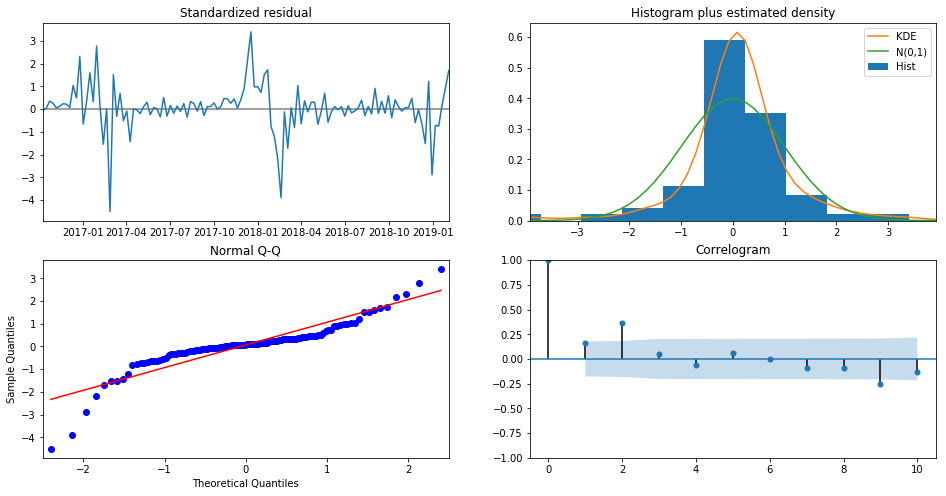

In [54]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

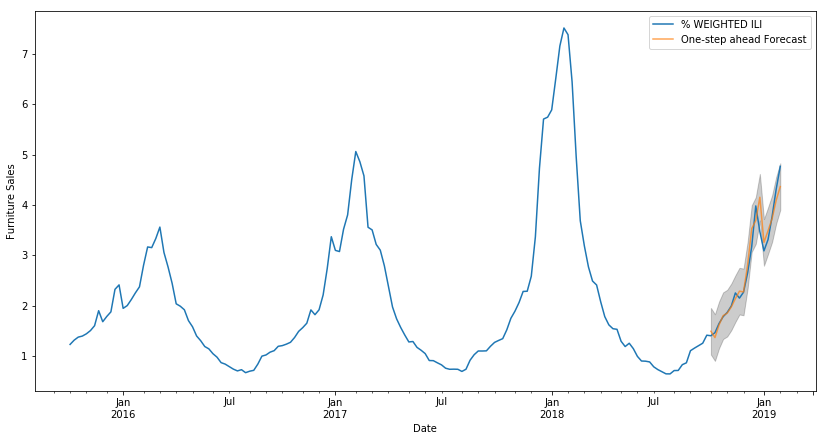

In [55]:
pred = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('% ILI')
plt.legend()
plt.show()

In [47]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-10-07':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2018-10-07 00:00:00   NaN
2018-10-14 00:00:00   NaN
2018-10-21 00:00:00   NaN
2018-10-28 00:00:00   NaN
2018-11-04 00:00:00   NaN
2018-11-11 00:00:00   NaN
2018-11-18 00:00:00   NaN
2018-11-25 00:00:00   NaN
2018-12-02 00:00:00   NaN
2018-12-09 00:00:00   NaN
2018-12-16 00:00:00   NaN
2018-12-23 00:00:00   NaN
2018-12-30 00:00:00   NaN
2019-01-06 00:00:00   NaN
2019-01-13 00:00:00   NaN
2019-01-20 00:00:00   NaN
2019-01-27 00:00:00   NaN
2019-02-03 00:00:00   NaN
% WEIGHTED ILI        NaN
dtype: float64


In [33]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2018-10-07 00:00:00   NaN
2018-10-14 00:00:00   NaN
2018-10-21 00:00:00   NaN
2018-10-28 00:00:00   NaN
2018-11-04 00:00:00   NaN
2018-11-11 00:00:00   NaN
2018-11-18 00:00:00   NaN
2018-11-25 00:00:00   NaN
2018-12-02 00:00:00   NaN
2018-12-09 00:00:00   NaN
2018-12-16 00:00:00   NaN
2018-12-23 00:00:00   NaN
2018-12-30 00:00:00   NaN
2019-01-06 00:00:00   NaN
2019-01-13 00:00:00   NaN
2019-01-20 00:00:00   NaN
2019-01-27 00:00:00   NaN
2019-02-03 00:00:00   NaN
% WEIGHTED ILI        NaN
dtype: float64


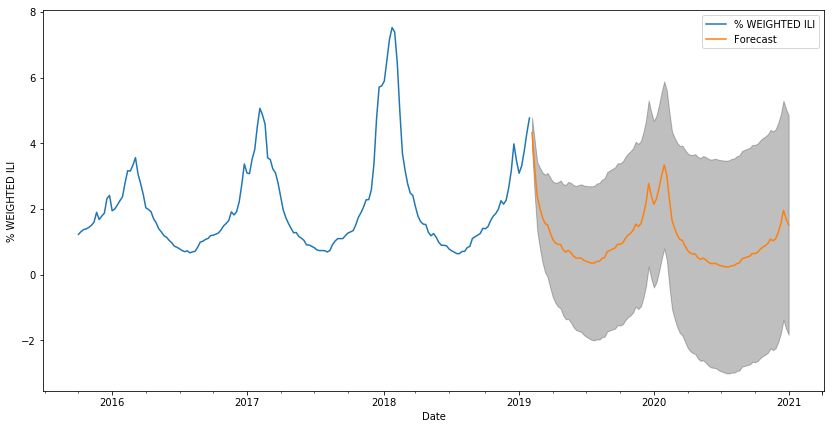

In [56]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ili_pred_pd = pd.DataFrame(pred_uc.predicted_mean)
ili_pred_pd.columns = ['Forecast % WEIGHTED ILI']
ili_pred_pd.to_csv("ili_pred_2019.csv")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('% WEIGHTED ILI')
plt.legend()
plt.show()

In [42]:
ili_pred_pd.head()

,Forecast % WEIGHTED ILI
2019-02-10,4.319609
2019-02-17,3.274867
2019-02-24,2.382309
2019-03-03,2.036682
2019-03-10,1.749198


In [57]:
who

X	 X_orig	 ax	 d	 decomposition	 fig	 ili_pred_pd	 itertools	 mod	 
mse	 np	 p	 param	 param_seasonal	 pd	 pdq	 plt	 pred	 
pred_ci	 pred_uc	 q	 rcParams	 results	 seasonal_pdq	 sm	 warnings	 y	 
y_forecasted	 y_orig	 y_truth	 


In [58]:
X.head()

,influenza,PERCENT POSITIVE,week
0,16,7.199298,2015-10-04
1,15,5.034722,2015-10-11
2,13,6.176962,2015-10-18
3,13,4.662379,2015-10-25
4,12,3.071672,2015-11-01


In [61]:
X_viral = X[['PERCENT POSITIVE','week']]
X_gt = X[['influenza','week']]
X_gt.head()

,influenza,week
0,16,2015-10-04
1,15,2015-10-11
2,13,2015-10-18
3,13,2015-10-25
4,12,2015-11-01


In [67]:
# ARIMA of viral test
#X_viral = X_viral.set_index('week')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_viral = sm.tsa.statespace.SARIMAX(X_viral,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_viral = mod_viral.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results_viral.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:1741.7478978575919
ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:5154.728486812775
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:963.5282832013143
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:972.4194264106366
ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:4580.678383717932
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:544.8866561055461
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:1524.70602280186
ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:855.6879081552665
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:870.3116927840299
ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:8834.915250670154
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:492.8626034269535
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:1021.407491734696
ARIMA(0, 1, 0)x(0, 0, 1, 52)52 - AIC:5859.389349528501
ARIMA(0, 1, 0)x(0, 1, 0, 52)52 - AIC:729.8902992442019
ARIMA(0, 1, 0)x(1, 0, 0, 52)52 - AIC:712.4757330957239
ARIMA(0, 1, 0)x(1, 0, 1, 52)52 - AIC:4992.915542266927
ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:415.12671429938524
ARIMA(0, 1, 1)x(0, 0, 0

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1140      0.132     -0.867      0.386      -0.372       0.144
ar.S.L52      -0.3229      0.113     -2.864      0.004      -0.544      -0.102
sigma2        20.7079      3.516      5.889      0.000      13.816      27.600


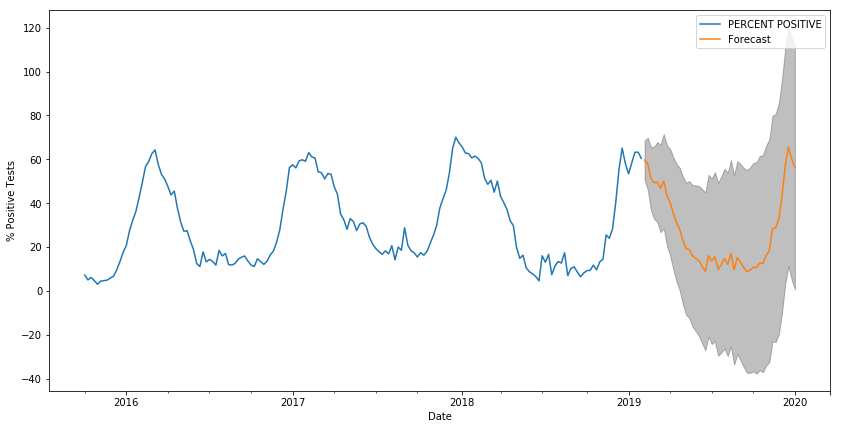

In [76]:
mod_viral = sm.tsa.statespace.SARIMAX(X_viral,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_viral = mod_viral.fit()
print(results_viral.summary().tables[1])

pred_uc_viral = results_viral.get_forecast(steps=48)
pred_ci_viral = pred_uc_viral.conf_int()
ax_viral = X_viral.plot(label='observed', figsize=(14, 7))
pred_uc_viral.predicted_mean.plot(ax=ax_viral, label='Forecast')
viral_pred_pd = pd.DataFrame(pred_uc_viral.predicted_mean)
viral_pred_pd.columns = ['Forecast % positive tests']
viral_pred_pd.to_csv("viralPositiveTests_pred_2019.csv")
ax_viral.fill_between(pred_ci_viral.index,
                pred_ci_viral.iloc[:, 0],
                pred_ci_viral.iloc[:, 1], color='k', alpha=.25)
ax_viral.set_xlabel('Date')
ax_viral.set_ylabel('% Positive Tests')
plt.legend()
plt.show()

In [69]:
# Grid search for Google Trends
X_gt = X_gt.set_index('week')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_gt = sm.tsa.statespace.SARIMAX(X_gt,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results_gt = mod_gt.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results_gt.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:1600.96858942308
ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:2050.7732775503146
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:1063.0744201411856
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:1063.2852777421203
ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:3268.084405255745
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:639.5387730615078
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:1386.139448355246
ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:7729.349946413099
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:919.7276215850808
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:925.1588254099669
ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:nan
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:558.215469866175
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:984.1542375141198
ARIMA(0, 1, 0)x(0, 0, 1, 52)52 - AIC:2166.2249810083526
ARIMA(0, 1, 0)x(0, 1, 0, 52)52 - AIC:761.7634248343111
ARIMA(0, 1, 0)x(1, 0, 0, 52)52 - AIC:724.7798998000407
ARIMA(0, 1, 0)x(1, 0, 1, 52)52 - AIC:4806.33816154858
ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:455.18828973683975
ARIMA(0, 1, 1)x(0, 0, 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6607      0.074      8.982      0.000       0.517       0.805
ar.S.L52      -0.5024      0.070     -7.221      0.000      -0.639      -0.366
sigma2        21.1831      1.867     11.343      0.000      17.523      24.843


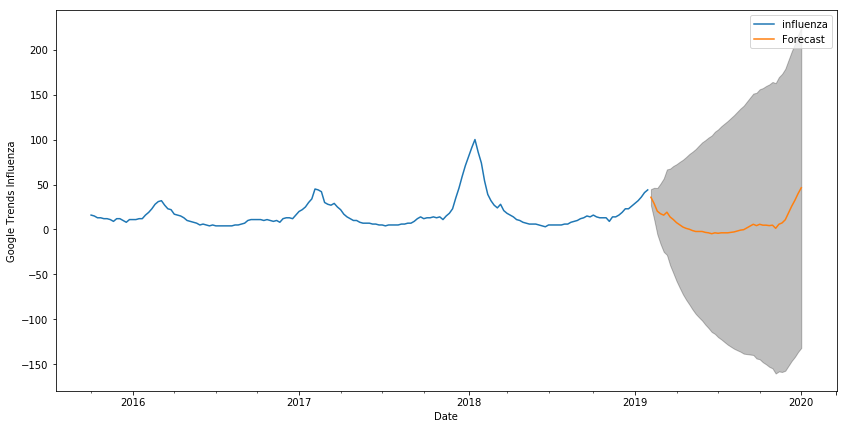

In [74]:
mod_gt = sm.tsa.statespace.SARIMAX(X_gt,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_gt = mod_gt.fit()
print(results_gt.summary().tables[1])

pred_uc_gt = results_gt.get_forecast(steps=48)
pred_ci_gt = pred_uc_gt.conf_int()
ax_gt = X_gt.plot(label='observed', figsize=(14, 7))
pred_uc_gt.predicted_mean.plot(ax=ax_gt, label='Forecast')
gt_pred_pd = pd.DataFrame(pred_uc_gt.predicted_mean)
gt_pred_pd.columns = ['Forecast Google Trends Influenza']
gt_pred_pd.to_csv("GT_pred_2019.csv")
ax_gt.fill_between(pred_ci_gt.index,
                pred_ci_gt.iloc[:, 0],
                pred_ci_gt.iloc[:, 1], color='k', alpha=.25)
ax_gt.set_xlabel('Date')
ax_gt.set_ylabel('Google Trends Influenza')
plt.legend()
plt.show()

In [71]:
who

X	 X_gt	 X_orig	 X_viral	 ax	 ax_gt	 ax_viral	 d	 decomposition	 
fig	 gt_pred_pd	 ili_pred_pd	 ili_pred_pd_viral	 itertools	 mod	 mod_gt	 mod_viral	 mse	 
np	 p	 param	 param_seasonal	 pd	 pdq	 plt	 pred	 pred_ci	 
pred_ci_gt	 pred_ci_viral	 pred_uc	 pred_uc_gt	 pred_uc_viral	 q	 rcParams	 results	 results_gt	 
results_viral	 seasonal_pdq	 sm	 warnings	 y	 y_forecasted	 y_orig	 y_truth	 


In [77]:
ili_pred_pd_viral.shape

(48, 1)

In [78]:
gt_pred_pd.shape

(48, 1)

In [79]:
del ili_pred_pd_viral

In [80]:
who

X	 X_gt	 X_orig	 X_viral	 ax	 ax_gt	 ax_viral	 d	 decomposition	 
fig	 gt_pred_pd	 ili_pred_pd	 itertools	 mod	 mod_gt	 mod_viral	 mse	 np	 
p	 param	 param_seasonal	 pd	 pdq	 plt	 pred	 pred_ci	 pred_ci_gt	 
pred_ci_viral	 pred_uc	 pred_uc_gt	 pred_uc_viral	 q	 rcParams	 results	 results_gt	 results_viral	 
seasonal_pdq	 sm	 viral_pred_pd	 warnings	 y	 y_forecasted	 y_orig	 y_truth	 


In [85]:
gt_viral_pred = pd.merge(gt_pred_pd, viral_pred_pd, left_index=True, right_index=True,how='left')

In [86]:
gt_viral_pred.shape

(48, 2)

In [87]:
gt_viral_pred.head()

,Forecast Google Trends Influenza,Forecast % positive tests
2019-02-10,35.821800,59.604364
2019-02-17,28.856958,57.955274
2019-02-24,20.338173,51.200063
2019-03-03,17.501840,49.260186
2019-03-10,15.940385,49.579375


In [88]:
who

X	 X_gt	 X_orig	 X_viral	 ax	 ax_gt	 ax_viral	 d	 decomposition	 
fig	 gt_pred_pd	 gt_viral_pred	 ili_pred_pd	 itertools	 mod	 mod_gt	 mod_viral	 mse	 
np	 p	 param	 param_seasonal	 pd	 pdq	 plt	 pred	 pred_ci	 
pred_ci_gt	 pred_ci_viral	 pred_uc	 pred_uc_gt	 pred_uc_viral	 q	 rcParams	 results	 results_gt	 
results_viral	 seasonal_pdq	 sm	 viral_pred_pd	 warnings	 y	 y_forecasted	 y_orig	 y_truth	 



In [89]:
gt_pred_pd.shape

(48, 1)